41 [200.48780488  15.29268293]


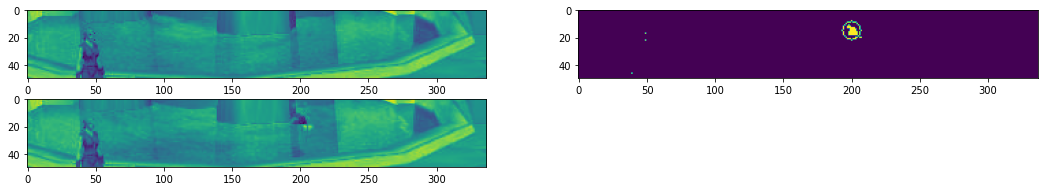

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('d:/projects/img00.jpg', 0)
img1 = cv2.imread('d:/projects/img19.jpg', 0)
diff = cv2.absdiff(img, img1)
ret, th1 = cv2.threshold(diff,64,255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
            cv2.THRESH_BINARY,3,2)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(th1, connectivity=8)
ccs = list(filter(lambda x: x[1][cv2.CC_STAT_AREA] > 20 and x[1][cv2.CC_STAT_AREA] < 100, enumerate(stats)))
if len(ccs) == 1:
    print(ccs[0][1][cv2.CC_STAT_AREA], centroids[ccs[0][0]])
cv2.circle(th1, tuple(map(int, centroids[1])), radius=7, color=(255,255,255), thickness=1)
f = plt.figure(figsize=(28, 3))
f.add_subplot(2, 3, 1)
plt.imshow(img)
f.add_subplot(2, 3, 4)
plt.imshow(img1)
f.add_subplot(2, 3, 2)
plt.imshow(th1)
plt.show()